In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

In [32]:
def twoBoxmodel(w, t, p):
    """
    Defines the differential equations for the two-box system model.
    
    Arguments:
        w: vector ofthe sate variables:
            w = [N_1, N_2]
        t: time
        p: vector of the parameters:
            p = [k_12, k_21, gamma]
    """
    N_1, N_2 = w
    k_12, k_21, gamma = p
    
    # Create f = (N_1, N_2):
    f = [-k_12*N_1 + k_21*N_2 + gamma,
         k_12*N_1-k_21*N_2]
    return f

In [29]:
# Import Global Co2 Emssions from Fossil-Fuel Burning data
fsl_CO2 = pd.read_csv('data_files/global.1751_2008.csv', skiprows = [1], usecols = [0,1])
fsl_CO2 = fsl_CO2.loc[(fsl_CO2['Year"'] > 1985) & (fsl_CO2['Year"'] < 2005)].reset_index(drop=True)
# Convert the values into ppm
fsl_CO2 = fsl_CO2.iloc[:,1]/1000/2.13

In [75]:
# Import Mauna Lao Volcano Observed values
obsv_CO2 = pd.read_csv('data_files/co2_annmean_mlo.csv',usecols = [0,1], comment = '#')
obsv_CO2 = obsv_CO2.loc[(obsv_CO2['year'] > 1985) & (obsv_CO2['year'] < 2005)].reset_index(drop=True)
obsv_CO2

,year,mean
0,1986,347.61
1,1987,349.31
2,1988,351.69
3,1989,353.20
4,1990,354.45
5,1991,355.70
6,1992,356.54
7,1993,357.21
8,1994,358.96
9,1995,360.97


In [57]:
fsl_CO2

0     2.633333
1     2.701878
2     2.801878
3     2.858216
4     2.887793
5     2.929108
6     2.900469
7     2.897653
8     2.950235
9     3.015023
10    3.075117
11    3.128169
12    3.116432
13    3.091080
14    3.169014
15    3.246948
16    3.277465
17    3.472770
18    3.653521
Name: Total carbon emissions from fossil-fuels (million metric tons of C), dtype: float64

In [58]:
from scipy.integrate import odeint

# Parameter values
k_12 = 105/740
k_21 = 102/900
gamma = fsl_CO2[18]

# Initial conditions
N_1 = 740/2.13
N_2 = 900/2.13

# Pack up the parameters and initial conditions:
p = [k_12, k_21, gamma]
w0 = [N_1, N_2]

# Set the time
# delta t = 1
t = np.arange(0,2004-1986+1)

# Call the ODE solver.
wsol = odeint(twoBoxmodel, w0, t, args=(p,))

In [55]:
t = np.arange(0,2004-1986+1)

In [56]:
t

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

In [60]:
wsol.reshape(19,2)

array([[347.41784038, 422.53521127],
       [349.58978877, 424.016784  ],
       [351.63794588, 425.62214802],
       [353.59018515, 427.32342987],
       [355.46811996, 429.09901619],
       [357.28846779, 430.93218949],
       [359.06422534, 432.80995306],
       [360.80542576, 434.72227377],
       [362.51985746, 436.6613632 ],
       [364.21354741, 438.62119438],
       [365.89116859, 440.59709432],
       [367.55634012, 442.58544391],
       [369.21186698, 444.58343818],
       [370.85992151, 446.58890478],
       [372.50218689, 448.60016053],
       [374.13996719, 450.61590136],
       [375.77427185, 452.63511782],
       [377.40588526, 454.65702553],
       [379.03541336, 456.68101857]])

In [61]:
atm_sol = wsol[:,0]
soc_sol = wsol[:,1]

In [62]:
year = np.arange(1986,2005,1)
year

array([1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
       1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004])

[[<matplotlib.axis.XTick at 0x1a261db5880>,

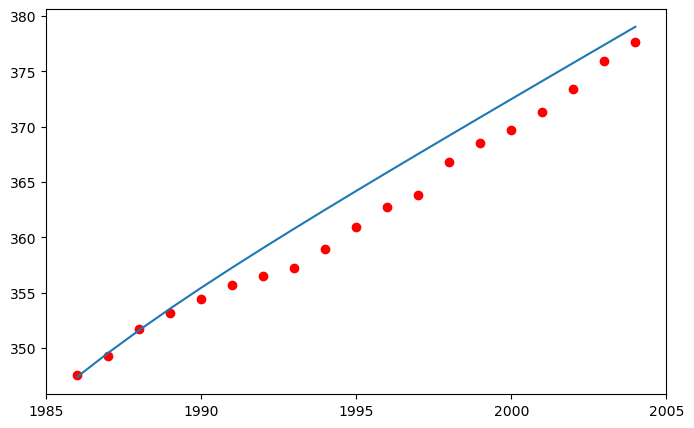

In [94]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(year,atm_sol)
ax.scatter(year,obsv_CO2['mean'],c = 'r')
ax.set(xticks = np.arange(1985,2010,5))